In [ ]:
#Read the provided CSV file ‘data.csv’.

import pandas as pd
df = pd.read_csv('data.csv')     #reading csv file
df


,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [ ]:
#Show the basic statistical description about the data.

df.describe()  
 #describe() results statistical description of data in data frame

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [ ]:
#Check if the data has null values.

df.isnull().any() 
 #check any column has null values

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [ ]:
#Replace the null values with the mean

mean=df['Calories'].mean()
df['Calories'].fillna(value=mean, inplace=True)  
#replacing Nan values with particular columns mean value

In [ ]:
df.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [ ]:
#Select at least two columns and aggregate the data using: min, max, count, mean.

df.agg({'Pulse' : ['min', 'max', 'count', 'mean'], 'Maxpulse' : ['min', 'max', 'count', 'mean'], 
        'Calories' : ['min', 'max', 'count', 'mean'] })
#agg method to aggreate operation on the dataframe

,Pulse,Maxpulse,Calories
min,80.000000,100.000000,50.300000
max,159.000000,184.000000,1860.400000
count,169.000000,169.000000,169.000000
mean,107.461538,134.047337,375.790244


In [ ]:
#Filter the dataframe to select the rows with calories values between 500 and 1000. 

df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)] 
  #'&' operator to filter the dataframe

,Duration,Pulse,Calories
51,80,123,643
62,160,109,853
65,180,90,800
66,150,105,873
67,150,107,816
72,90,100,700
73,150,97,953
75,90,98,563
78,120,100,500
83,120,100,500


In [ ]:
#Filter the dataframe to select the rows with calories values > 500 and pulse < 100.

df[(df['Calories'] > 500) & (df['Pulse'] < 100)]  
 # '&' operator is used to filter the data 

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [ ]:
#Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.

df_modified = df[['Duration', 'Pulse', 'Calories']].copy() 
 #copy method to create an another data frome with specified columns from the original dataframe.
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [ ]:
# Delete the “Maxpulse” column from the main df dataframe

df.pop('Maxpulse')  
 #pop method to remove a column from the data frame
df

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [ ]:
#Convert the datatype of Calories column to int datatype.

df['Calories'] = df['Calories'].astype(int)  
#astype function converts one data type into another
df.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Duration', ylabel='Calories'>

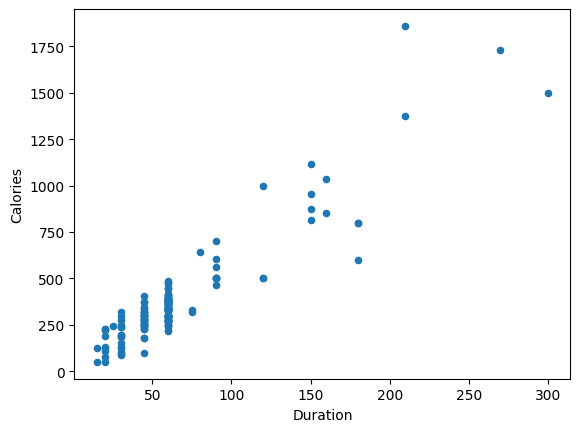

In [ ]:
#Using pandas create a scatter plot for the two columns (Duration and Calories).
df.plot.scatter(x='Duration', y='Calories')

In [55]:
#1.Titanic dataset
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


a. Do you think we should keep this feature?
As correlation results shows that males were strongly negatively correlated, and females were Strongly positively correlated with their survival. Males are inversely proportional, and females are directly proportional to their survival. So, we need this feature to analysis.


In [56]:
#correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case in class.
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df.Sex.values)
df['Survived'].corr(df['Sex'])

-0.5433513806577555

In [57]:
# Drop non-numeric columns from the dataframe
df = df.drop(['Name', 'Sex','Ticket','Cabin','Embarked'], axis=1)

#creating corelation matrix
matrix = df.corr()
print(matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [59]:
#visualization 1 of Titanic Dataset
df.corr().style.background_gradient(cmap="Greens")


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


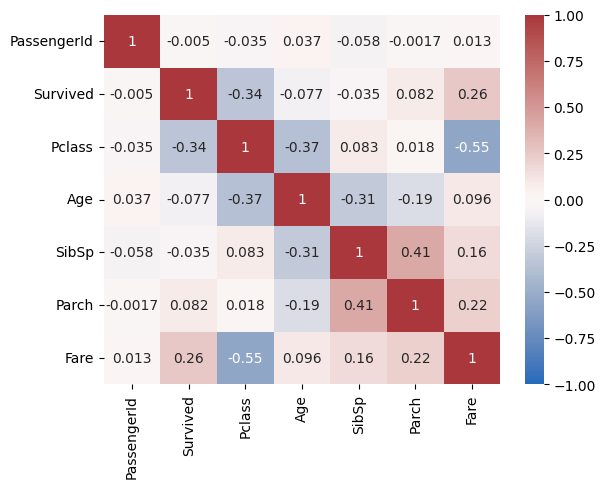

In [60]:
#visualization 2 of Titanic Dataset
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [61]:
#Naïve Bayes method of Titanic Dataset
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("train.csv")

# Select features and target
features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

# Preprocess categorical variables
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 77.65%


In [62]:
#2.Glass Dataset
glass=pd.read_csv("glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [65]:
#Naïve Bayes method of Glass Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Load the dataset
glass_data = pd.read_csv('glass.csv')

# Separate the target variable
X = glass_data.drop(['Type'], axis=1)
y = glass_data['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
report = classification_report(y_test, y_pred)

print("Accuracy Score: {:.2f}%".format(score * 100))
print("\nClassification Report:\n", report)

Accuracy Score: 55.81%

Classification Report:
               precision    recall  f1-score   support

           1       0.41      0.64      0.50        11
           2       0.43      0.21      0.29        14
           3       0.40      0.67      0.50         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.56        43
   macro avg       0.60      0.63      0.59        43
weighted avg       0.55      0.56      0.53        43



In [66]:
#Linear SVM method of Glass Dataset
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
#To avoid warnings
warnings.filterwarnings("ignore")

# Load the dataset
glass_data = pd.read_csv('glass.csv')

# Separate the target variable
X = glass_data.drop(['Type'], axis=1)
y = glass_data['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear SVM model
model = LinearSVC(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
report = classification_report(y_test, y_pred)

print("Accuracy Score: {:.2f}%".format(score * 100))
print("\nClassification Report:\n", report)

Accuracy Score: 51.16%

Classification Report:
               precision    recall  f1-score   support

           1       0.37      1.00      0.54        11
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       0.00      0.00      0.00         3
           7       0.80      1.00      0.89         8

    accuracy                           0.51        43
   macro avg       0.36      0.46      0.38        43
weighted avg       0.34      0.51      0.38        43



In [63]:
#visualization 1 of Glass Dataset
glass.corr().style.background_gradient(cmap="Greens")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


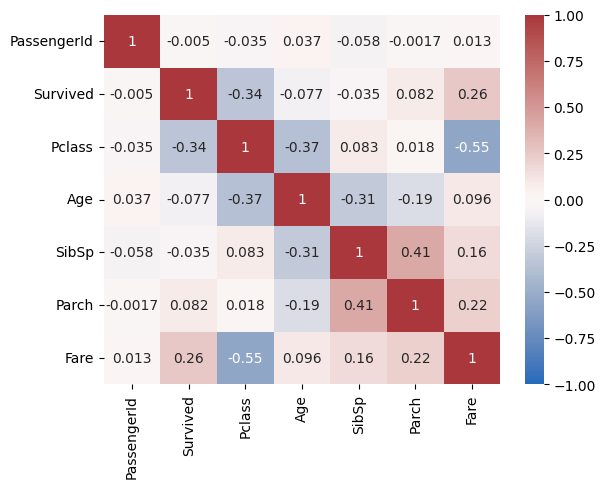

In [64]:
#visualization 2 of Glass Dataset
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

Which algorithm you got better accuracy? Can you justify why?
Among Naïve Bayes and Support vector machine algorithms, naïve bayes got better accuracy
than the SVM. Naïve Bayes gives better results than SVM for this data set. we may get better
results using SVM than naïve bayes when we work with another data set. In this glass data set,
types of glass are independent predictors. When there are any independent predictors present
in the data set naïve bayes perform better than other models. 